In [1]:
import tensorflow
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten,Dropout
from keras import backend as k
import numpy as np
import os

Using TensorFlow backend.


In [30]:
img_w,img_h=256,256
train='C:/Users/sindh/OneDrive/Desktop/Mens/training'
test='C:/Users/sindh/OneDrive/Desktop/Mens/testing'

batch_size=100
epochs=15
num_cls=2

if k.image_data_format()=='channels_first':
    input_shape=(3,img_w,img_h)
else:
    input_shape=(img_w,img_h,3)

model=Sequential()


model.add(Conv2D(32,(3,3),input_shape=input_shape))          
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3)))          
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Activation('relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_cls,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_28 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
activation_29 (Activation)   (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 123, 123, 64)    

In [141]:
!pip install matplotlib

^C


In [ ]:
!pip install pydot
!pip install pydotplus
!pip install pydot_ng
!pip install graphviz

In [ ]:
pip install graphviz

In [7]:
#keras.utils.plot_model(model,
                     # to_file='model.png')

In [31]:
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,
                            zoom_range=0.2
                            ,horizontal_flip=True)
test_gen=ImageDataGenerator(rescale=1./255)

train_generator=train_gen.flow_from_directory(train,
                                             batch_size=10
                                             ,class_mode='categorical')
test_generator=test_gen.flow_from_directory(test,
                                             batch_size=10
                                             ,class_mode='categorical')

Found 100 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [32]:
hist=model.fit_generator(train_generator,
                    epochs=10,validation_data=test_generator,
                   )

model.save_weights('Men_shirts.h5')

Epoch 1/10
10/10 [==============================] - 16s 2s/step - loss: 2.4270 - accuracy: 0.5400 - val_loss: 0.6943 - val_accuracy: 0.4833
Epoch 2/10
10/10 [==============================] - 15s 2s/step - loss: 0.6902 - accuracy: 0.6400 - val_loss: 0.6930 - val_accuracy: 0.6167
Epoch 3/10
10/10 [==============================] - 14s 1s/step - loss: 0.7118 - accuracy: 0.5600 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 15s 1s/step - loss: 0.6882 - accuracy: 0.6400 - val_loss: 0.6495 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 15s 1s/step - loss: 0.7135 - accuracy: 0.5400 - val_loss: 0.6800 - val_accuracy: 0.6000
Epoch 6/10
10/10 [==============================] - 15s 1s/step - loss: 0.6772 - accuracy: 0.6500 - val_loss: 0.6852 - val_accuracy: 0.5833
Epoch 7/10
10/10 [==============================] - 16s 2s/step - loss: 0.6617 - accuracy: 0.7100 - val_loss: 0.6494 - val_accuracy: 0.5833
Epoch 8/10
10/10 [==

C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


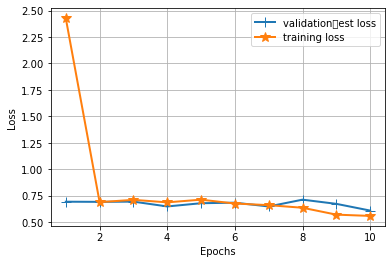

In [33]:
import matplotlib.pyplot as plt
hist_m=hist.history

loss_values=hist_m['loss']
val_loss_values=hist_m['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='validation\test loss')
line2=plt.plot(epochs,loss_values,label='training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10)
plt.setp(line2,linewidth=2.0,marker='*',markersize=10)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

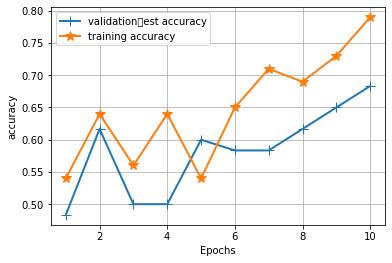

In [34]:
hist_m=hist.history

acc_values=hist_m['accuracy']
val_acc_values=hist_m['val_accuracy']
epochs=range(1,len(acc_values)+1)

line1=plt.plot(epochs,val_acc_values,label='validation\test accuracy')
line2=plt.plot(epochs,acc_values,label='training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10)
plt.setp(line2,linewidth=2.0,marker='*',markersize=10)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()